**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


***Importing all the packages required***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import geom
import math

In [2]:
#Importing the Walmart dataset
df=pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [10]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 550068 rows and 10 columns


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [19]:
#Changing Datatype of columns User_ID, Occupation, Martial_Status and Product_Category
c=['User_ID','Occupation','Marital_Status','Product_Category']
df[c]=df[c].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [20]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


*There is a significant difference between mean and median (50%) which concludes mean is effected by outliers.*

In [21]:
df.describe(include='object')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [75]:
#Missing Values Check

In [23]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

*Incase of missing values, the field should be replaced by either of mean,median or mode. But, no missing values present in the dataset.*

In [41]:
#Unique no of users, products,gender, age groups, occupations.....
for i in df.columns[:-1]:
    print(f"Unique_{i}: {df[i].nunique()}")

Unique_User_ID: 5891
Unique_Product_ID: 3631
Unique_Gender: 2
Unique_Age: 7
Unique_Occupation: 21
Unique_City_Category: 3
Unique_Stay_In_Current_City_Years: 5
Unique_Marital_Status: 2
Unique_Product_Category: 20


**On black friday sale the count of unique users who purchased is 5891 which constitutes 3631 products among 20 unique product categories**

Value_counts of categorical columns Gender, Age, Occupation, city category, stay in current city years, martial status,product category

In [49]:
for i in df.columns[2:-1]:
    print(df[i].value_counts())

M    414259
F    135809
Name: Gender, dtype: int64
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
0    324731
1    225337
Name: Marital_Status, dtype: int64
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype

In [54]:
cat_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[cat_cols].melt()

,variable,value
0,Gender,F
1,Gender,F
2,Gender,F
3,Gender,F
4,Gender,M
...,...,...
3850471,Product_Category,20
3850472,Product_Category,20
3850473,Product_Category,20
3850474,Product_Category,20


In [74]:
value_counts=df[cat_cols].melt().groupby(['variable','value'])[['value']].count()/df.shape[0] *100
value_counts.rename(columns={'value':'value_count %'})

value_count %
variable                   value               
Age                        0-17        2.745479
                           18-25      18.117760
                           26-35      39.919974
                           36-45      19.999891
                           46-50       8.308246
                           51-55       6.999316
                           55+         3.909335
City_Category              A          26.854862
                           B          42.026259
                           C          31.118880
Gender                     F          24.689493
                           M          75.310507
Marital_Status             0          59.034701
                           1          40.965299
Occupation                 0          12.659889
                           1           8.621843
                           2           4.833584
                           3           3.208694
                           4          13.145284
                           5           2.213726
                           6           3.700452
                           7          10.750125
                           8           0.281056
                           9           1.143677
                           10          2.350618
                           11          2.106285
                           12          5.668208
                           13          1.404917
                           14          4.964659
                           15          2.211545
                           16          4.612339
                           17          7.279645
                           18          1.203851
                           19          1.538173
                           20          6.101427
Product_Category           1          25.520118
                           2           4.338373
                           3           3.674637
                           4           2.136645
                           5          27.438971
                           6           3.720631
                           7           0.676462
                           8          20.711076
                           9           0.074536
                           10          0.931703
                           11          4.415272
                           12          0.717548
                           13          1.008784
                           14          0.276875
                           15          1.143495
                           16          1.786688
                           17          0.105078
                           18          0.568112
                           19          0.291419
                           20          0.463579
Stay_In_Current_City_Years 0          13.525237
                           1          35.235825
                           2          18.513711
                           3          17.322404
                           4+         15.402823

Observations from categorical columns with help of value counts:

    1) Around ~85% of customers belongs to the ages between 18 to 50.
    
    2) There are three city categories where larger share is from city category C i.e 42%.
    
    3) 75% of users are male customers who purchased on black friday.
    
    4) 60% are Single users, 40% are married users.
    
    5) There are 20 different occupation categories, highest no of users belong to 4 occupation category i.e. 13%.
    
    6) Most no of users purchased the products which belong to 5 product category i.e 27%.
    
    7) 35% of users are staying in current city for the past 1 year.

# Outlier Detection

In [76]:
#Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

In [77]:
import statistics as stat

In [80]:
Purchase_data_mean=df['Purchase'].mean()
Purchase_data_mean

9263.968712959126

In [81]:
Purchase_data_median=stat.median(df['Purchase'])
Purchase_data_median

8047.0

In [82]:
Difference=Purchase_data_mean-Purchase_data_median
Difference

1216.9687129591257

We can see a difference of 1216 units between mean and median because of outliers affecting the mean.In this case median (50%) should be considered as average.

***Average purchase amount of the user on black friday sale is 8047 units.***

In [84]:
purchase_25p=np.percentile(df['Purchase'],25)
purchase_50p=np.percentile(df['Purchase'],50)
purchase_75p=np.percentile(df['Purchase'],75)
IQR_purchase=purchase_75p-purchase_25p
print(IQR_purchase)
upper_whisker_purchase=purchase_75p + 1.5*IQR_purchase
lower_whisker_purchase=max(purchase_25p - 1.5*IQR_purchase,0)
lower_whisker_purchase,upper_whisker_purchase

6231.0


(0, 21400.5)

***Purchases which are greater than 21400.5 units can be conidered as outliers***

In [89]:
Purchase_outliers=df[df['Purchase']>upper_whisker_purchase]
Purchase_outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [92]:
print(f'There are {len(Purchase_outliers)} outliers wrt to purchases done by the users.')

There are 2677 outliers wrt to purchases done by the users.


# Univariate Analysis

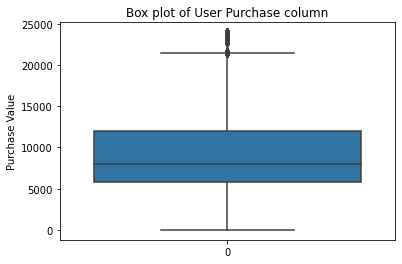

In [99]:
sns.boxplot(data=df['Purchase'])
plt.title("Box plot of User Purchase column")
plt.ylabel("Purchase Value")
plt.show()

In [111]:
#All the dots after the upper whisker range in the above represent purchase outliers

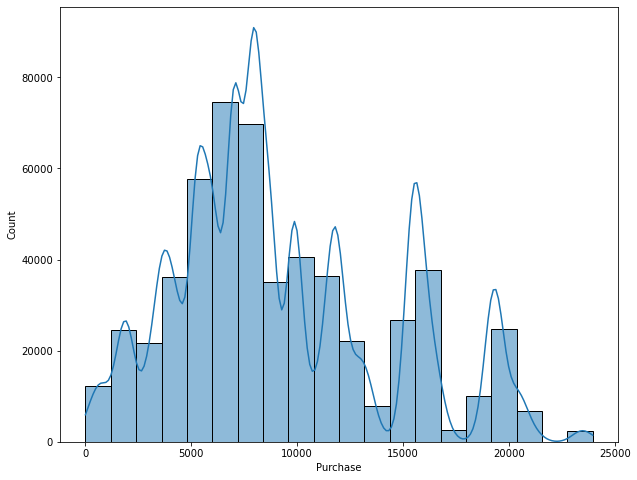

In [109]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='Purchase',kde=True,bins=20)
plt.show()

In [117]:
#Majority of purchases lie between 5000 to 9000 units

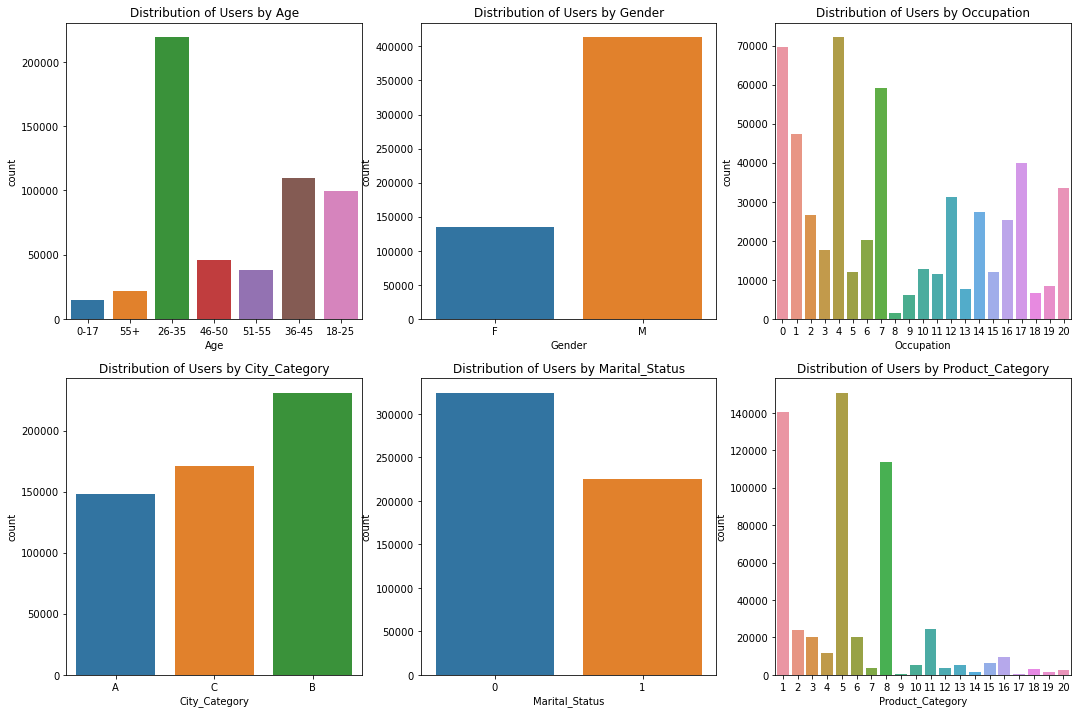

In [116]:
fig, ax=plt.subplots(2,3,figsize=(18,12)) #Distribution of products by age
sns.countplot(ax=ax[0,0],data=df,x='Age')
ax[0,0].set_title('Distribution of Users by Age')

sns.countplot(ax=ax[0,1],data=df,x=df['Gender'])
ax[0,1].set_title('Distribution of Users by Gender')

sns.countplot(ax=ax[0,2],data=df,x=df['Occupation'])
ax[0,2].set_title('Distribution of Users by Occupation')

sns.countplot(ax=ax[1,0],data=df,x=df['City_Category'])
ax[1,0].set_title('Distribution of Users by City_Category')

sns.countplot(ax=ax[1,1],data=df,x=df['Marital_Status'])
ax[1,1].set_title('Distribution of Users by Marital_Status')

sns.countplot(ax=ax[1,2],data=df,x=df['Product_Category'])
ax[1,2].set_title('Distribution of Users by Product_Category')
plt.show()

In [145]:
stay=df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
stay.index

Index(['1', '2', '3', '4+', '0'], dtype='object')

In [143]:
stay.replace(to_replace='4+',value=4,inplace=True)

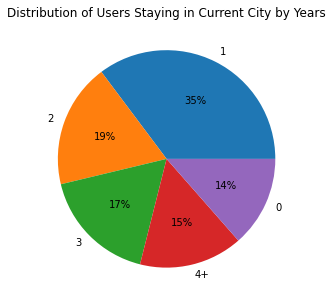

In [151]:
plt.figure(figsize=(8,5))
plt.pie(x=stay.values,labels=stay.index,autopct='%.0f%%')
plt.title('Distribution of Users Staying in Current City by Years')
plt.show()

Observations from categorical columns with help of value counts:

    1) Around ~85% of customers belongs to the ages between 18 to 50.
    
    2) There are three city categories where larger share is from city category C i.e 42%.
    
    3) 75% of users are male customers who purchased on black friday.
    
    4) Most users are singles
    
    5) There are 20 different occupation categories, highest no of users belong to 4 occupation category followed by 0,7,1,17 categories
    
    6) Most no of users purchased the products which belong to 5,1,8 product categories.
    
    7) Most of the users are staying in current city for the past 1 year.
    

# Bivariate Analysis

In [166]:
attr=df.columns[2:9].values
attr

array(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category'],
      dtype=object)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

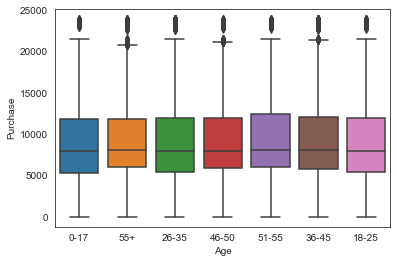

In [154]:
attributes=['Age',]
sns.boxplot(data=df,x='Age',y='Purchase')

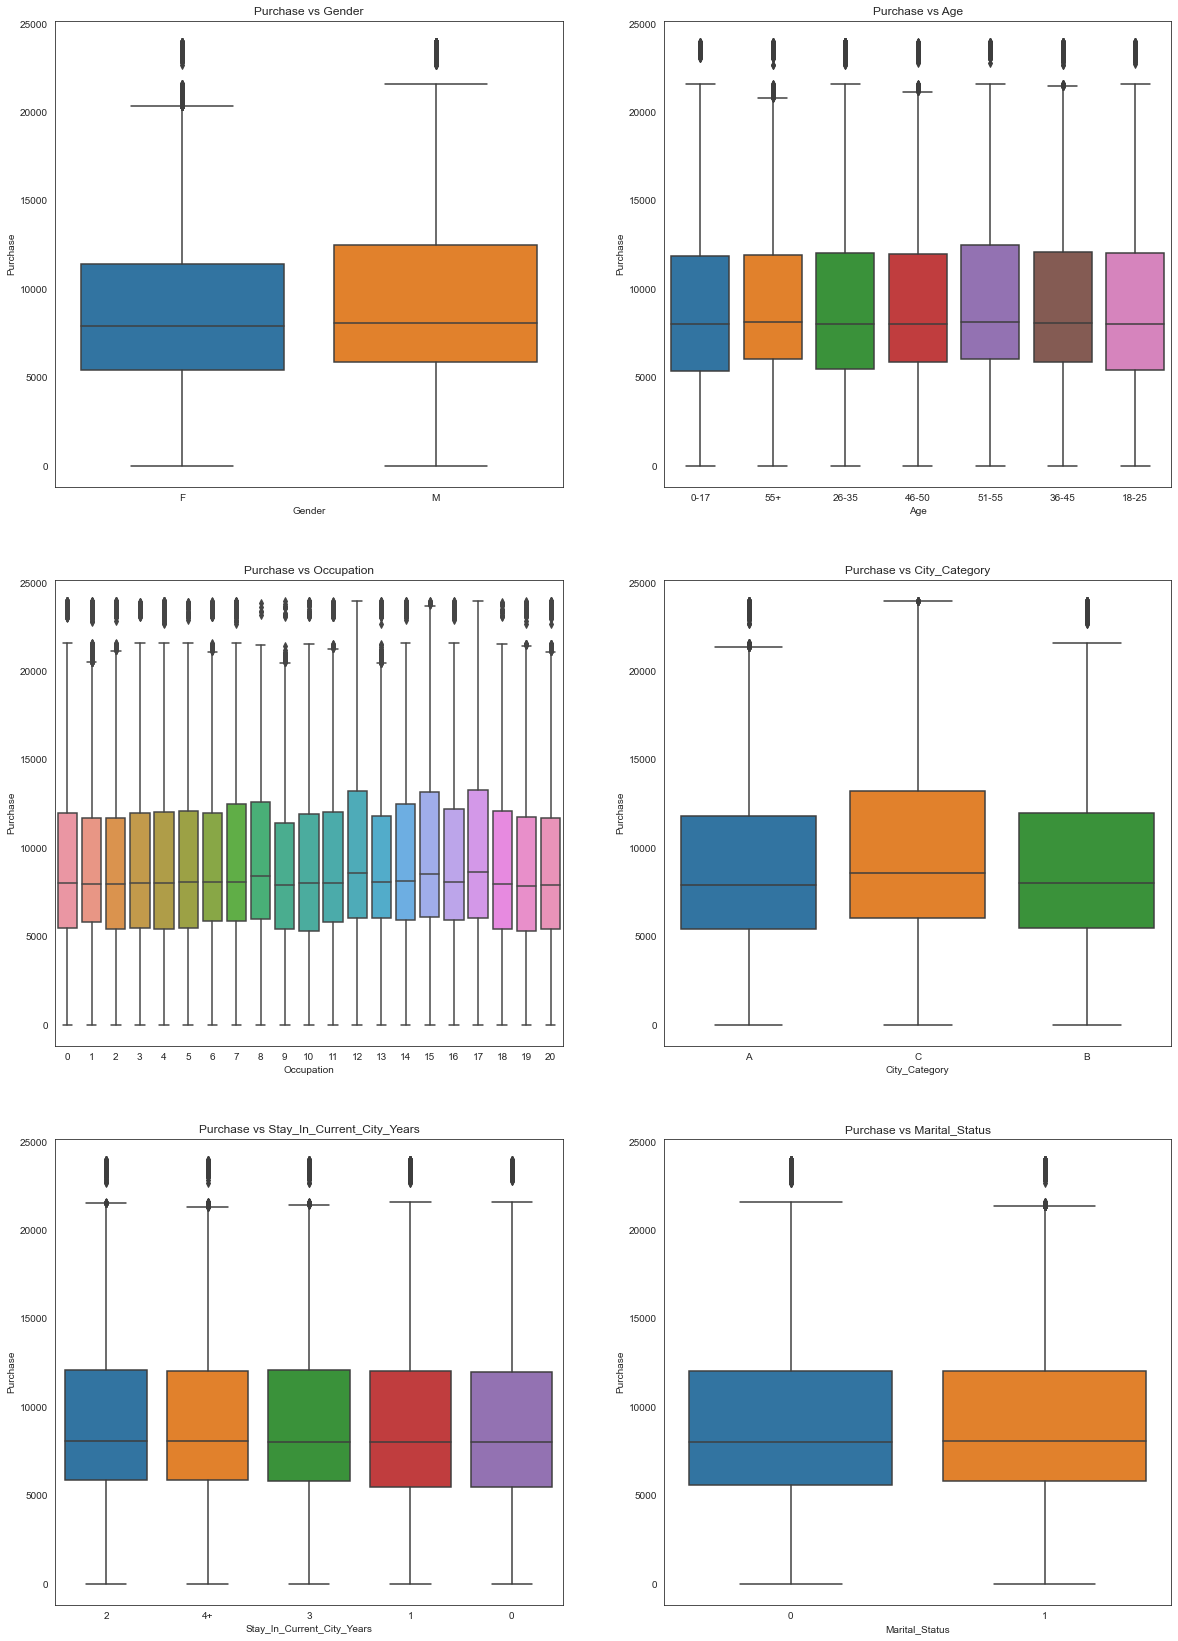

In [215]:
fig, ax=plt.subplots(3,2,figsize=(20,16))
fig.subplots_adjust(top=1.5)
idx=0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df,x=attr[idx],y='Purchase',ax=ax[i,j])
        ax[i,j].set_title(f'Purchase vs {attr[idx]}')
        idx+=1
plt.show()

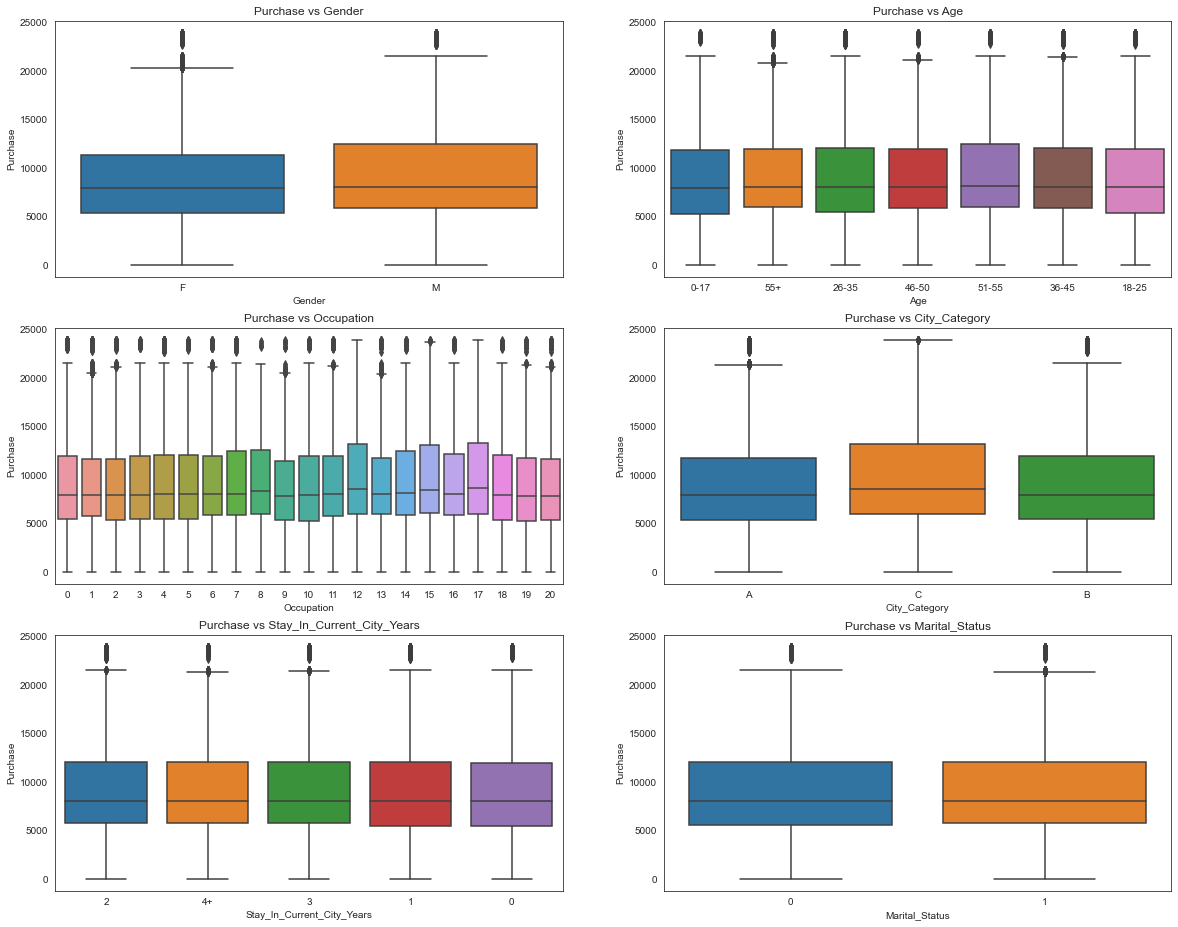

In [206]:
fig, ax=plt.subplots(3,2,figsize=(20,16))
sns.boxplot(data=df,x=attr[0],y='Purchase',ax=ax[0,0])
ax[0,0].set_title(f'Purchase vs {attr[0]}')

sns.boxplot(data=df,x=attr[1],y='Purchase',ax=ax[0,1])
ax[0,1].set_title(f'Purchase vs {attr[1]}')

sns.boxplot(data=df,x=attr[2],y='Purchase',ax=ax[1,0])
ax[1,0].set_title(f'Purchase vs {attr[2]}')

sns.boxplot(data=df,x=attr[3],y='Purchase',ax=ax[1,1])
ax[1,1].set_title(f'Purchase vs {attr[3]}')

sns.boxplot(data=df,x=attr[4],y='Purchase',ax=ax[2,0])
ax[2,0].set_title(f'Purchase vs {attr[4]}')

sns.boxplot(data=df,x=attr[5],y='Purchase',ax=ax[2,1])
ax[2,1].set_title(f'Purchase vs {attr[5]}')
plt.show()

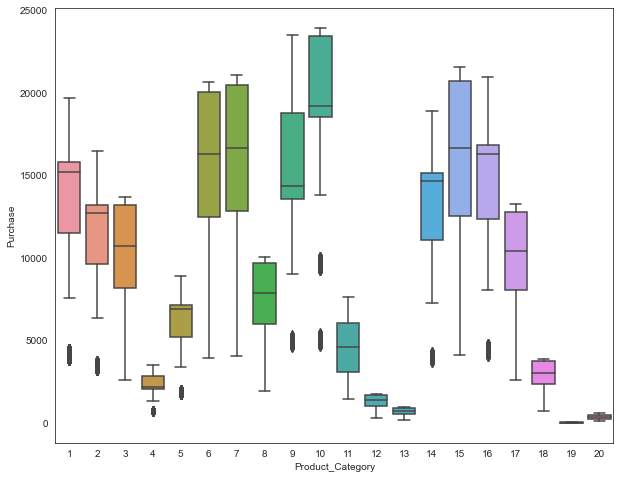

In [217]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x=attr[6],y='Purchase')
plt.show()

Observations:
    
    1) Male users purchase is a bit higher than the female on Black friday.
    
    2) All age groups have a similar range of purchase where 51-55 age group purchases are slightly higher.
    
    3) Users from Occupation 12,17 have made higher purchases.
    
    4) Users from city C group has less outliers and made higher purchases.
    
    5) Users Marital status is not likely dependent to make a higher purchase.
    
    6) Products belonging to 10,7,15,6 product categories have higher purchase value.

# Multivariate Analysis

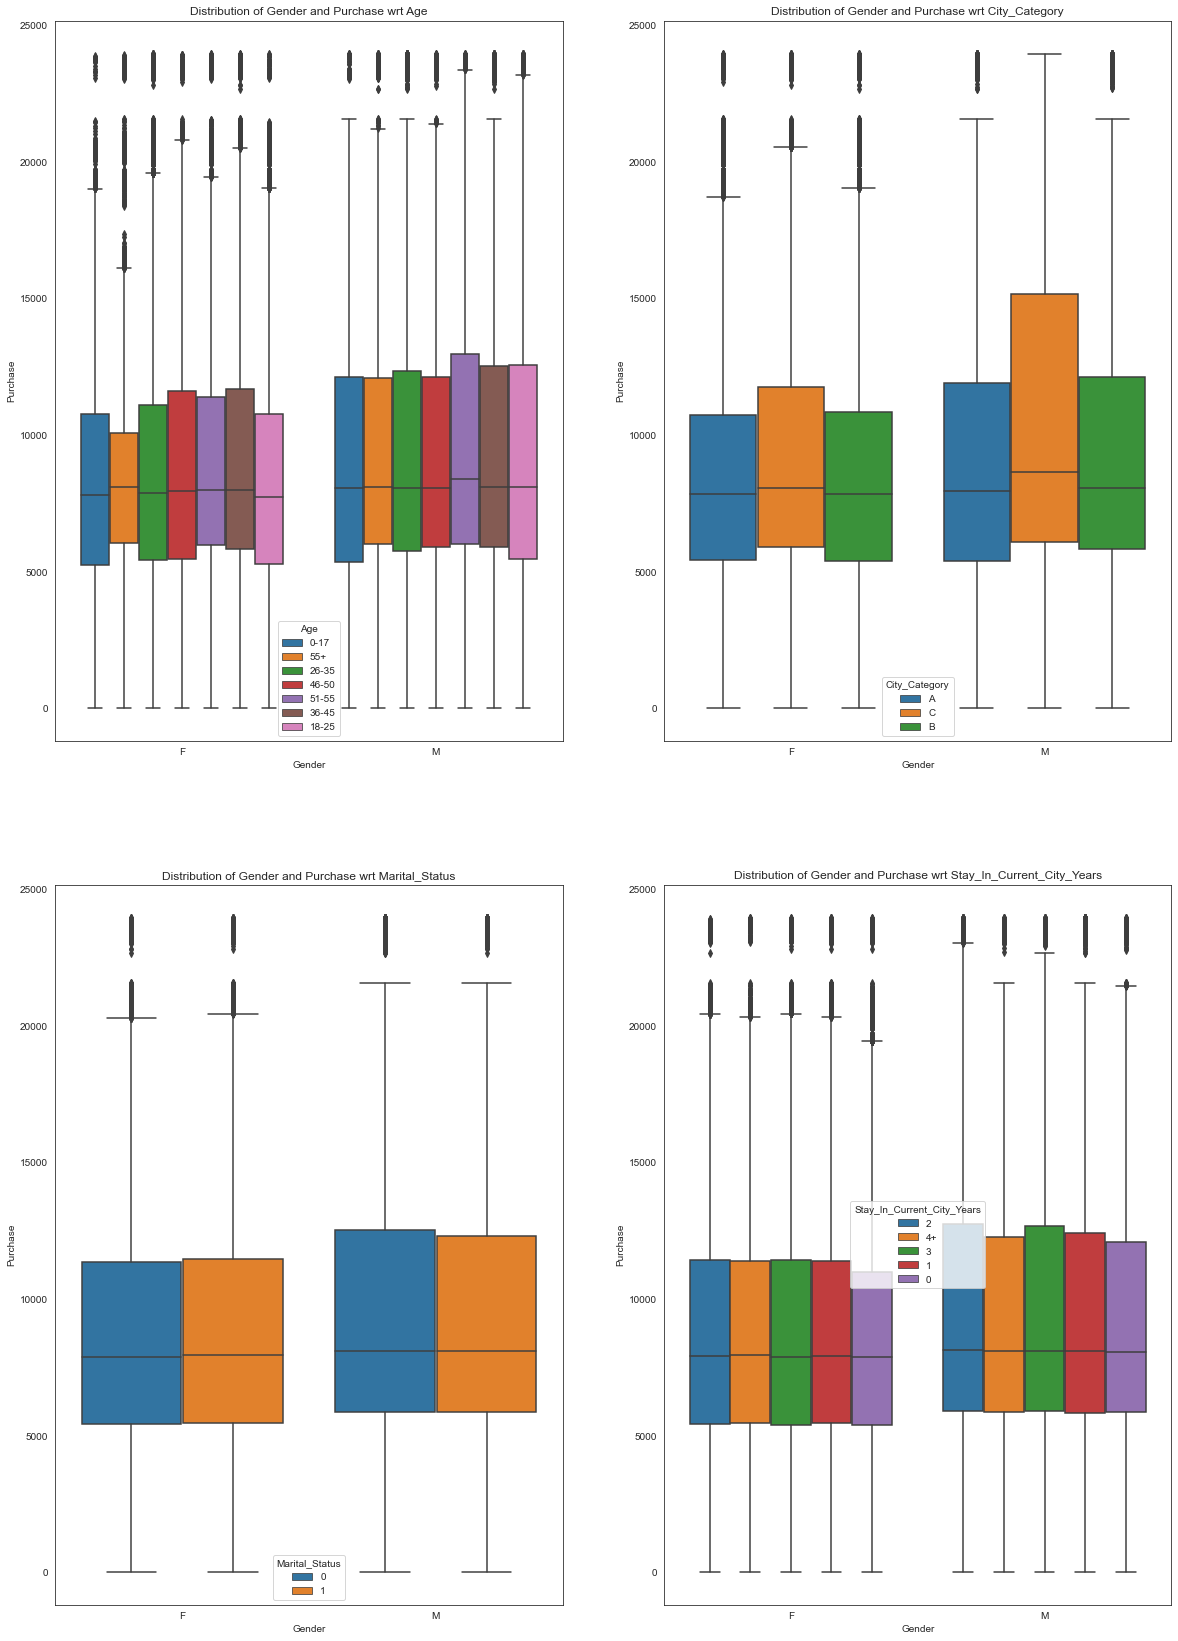

In [224]:
attr1=['Age','City_Category','Marital_Status','Stay_In_Current_City_Years']
fig, ax=plt.subplots(2,2,figsize=(20,16))
fig.subplots_adjust(top=1.5)
idx=0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df,x='Gender',y='Purchase',hue=attr1[idx],ax=ax[i,j])
        ax[i,j].set_title(f'Distribution of Gender and Purchase wrt {attr1[idx]}')
        idx+=1
plt.show()

Observations:

    1) Male cutomers purchase more than the females, among males 51-55 age group average purchase value is high compared to others.
    
    2) Males from City category A have high purchase value compared to other categories where females from category A has low purchase values.
    
    3) Single men are likely to spend more than others as per the data on black friday sale.
    
    4) People who are staying in the current city for 2 years have high average purchase values.

# Statistical Analysis

**Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.**

**Are women spending more money per transaction than men? Why or Why not?**

In [240]:
#Here to find mean per transaction all the 55k records to be considered, but if its for user then we can do group by.

#There are some unique users who purchased multiple times, grouping them will result us the insights as per the customer. 

In [268]:
male_trans_mean=df[df['Gender']=='M']['Purchase'].mean()
female_trans_mean=df[df['Gender']=='F']['Purchase'].mean()
print("Average amount of the male customer transactions on black friday is {:.2f}".format(male_trans_mean))
print('Average amount of the female customer transactions on black friday is {:.2f}'.format(female_trans_mean))

Average amount of the male customer transactions on black friday is 9437.53
Average amount of the female customer transactions on black friday is 8734.57


***Male customers are having higher transaction average value than the female customer transactions***

In [257]:
user_amt=df.groupby(['User_ID','Gender'])[['Purchase']].sum().reset_index()
user_amt

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [301]:
users_purchase=user_amt['Purchase']
users_purchase_avg=users_purchase.mean()
print("Average amount spend by a user on black friday is {:.2f}".format(users_purchase_avg))

Average amount spend by a user on black friday is 865016.59


<AxesSubplot:xlabel='Purchase', ylabel='Count'>

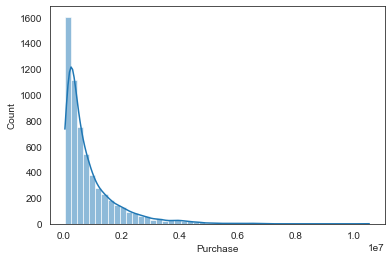

In [298]:
sns.histplot(data=users_purchase,kde=True,bins=50)

In [273]:
male_user_mean=user_amt[user_amt['Gender']=='M']['Purchase'].mean()
female_user_mean=user_amt[user_amt['Gender']=='F']['Purchase'].mean()
print("Average amount spend by male user on black friday is {:.2f}".format(male_user_mean))
print('Average amount spend by female user on black friday is {:.2f}'.format(female_user_mean))

Average amount spend by male user on black friday is 925344.40
Average amount spend by female user on black friday is 712024.39


***The difference between average spent value of male and female user shows that male users are supposed to do more business to the company.***

<function matplotlib.pyplot.show(close=None, block=None)>

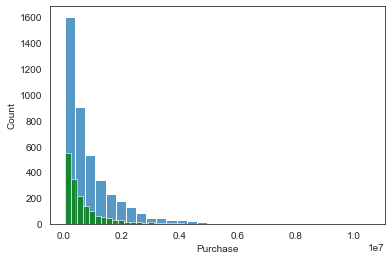

In [291]:
sns.histplot(data=user_amt[user_amt['Gender']=='M']['Purchase'],bins=30)
plt.show
sns.histplot(data=user_amt[user_amt['Gender']=='F']['Purchase'],bins=30,color='g')
plt.show

## Applying Central Limit Theorem to find average user spent on black friday considering gender

In [323]:
sample_users_mean_1600 = [np.mean(users_purchase.sample(1600)) for i in range(10000)]

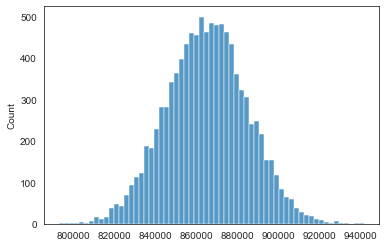

In [324]:
sns.histplot(data=sample_users_mean_1600)
plt.show()

In [325]:
np.mean(sample_users_mean_1600)

864983.0429273124

In [326]:
np.std(sample_users_mean_1600)

19671.35902855808

Observations: (~30% is considered as sample size)
    
    The above symmetric normal distribution shows ths distribution range of means of sample means of all the user purchases
    
    Mean of sample means of user purchase is 864983.04 and standard deviation is 19671.35

***Sample Average Purchase distribution using CLT for male and female users***

In [322]:
male_user_purchase=user_amt[user_amt['Gender']=='M']['Purchase']
female_user_purchase=user_amt[user_amt['Gender']=='F']['Purchase']

In [332]:
#Lets conisder male sample size as 1250, female sample size of 500
male_sample_avg_1250=[np.mean(male_user_purchase.sample(1250)) for i in range(10000)]
female_sample_avg_500=[np.mean(female_user_purchase.sample(500)) for i in range(10000)]

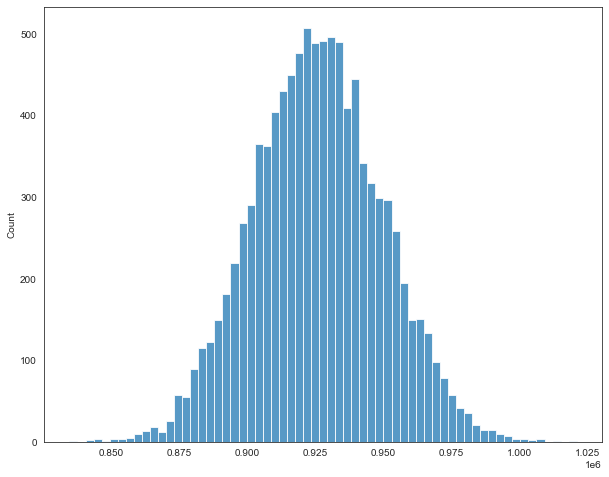

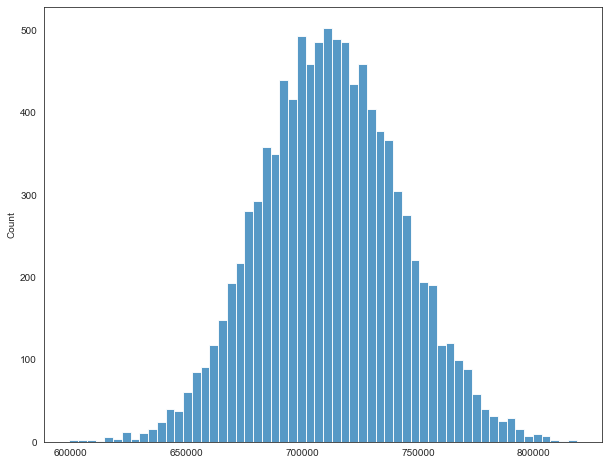

In [336]:
plt.figure(figsize=(10,8))
sns.histplot(data=male_sample_avg_1250)
plt.show()

plt.figure(figsize=(10,8))
sns.histplot(data=female_sample_avg_500)
plt.show()

In [339]:
print(np.mean(male_sample_avg_1250),np.std(male_sample_avg_1250))
print(np.mean(female_sample_avg_500),np.std(female_sample_avg_500))

925813.44646712 23678.338743132586
712173.7899049999 30194.742816024504


Observations: (~30% is considered as sample size)
    
    The above symmetric normal distribution shows ths distribution range of means of sample means of all the user purchases
    
   ***Mean of sample means of male user purchase is 925813.45 and standard deviation is 23678.34***.
    
   ***Mean of sample means of female user purchase is 712173.78 and standard deviation is 30194.74***

According to the CLT, if the sample size increases the spread becomes close to the mean.

In [340]:
#Considering 95% as confidence interval the z value is 1.96 which will help in finding the intervals

In [344]:
male_sample_lower_lim=np.mean(male_sample_avg_1250) - 1.96*(np.std(male_user_purchase)/np.sqrt(1250))
male_sample_upper_lim=np.mean(male_sample_avg_1250) + 1.96*(np.std(male_user_purchase)/np.sqrt(1250))

female_sample_lower_lim=np.mean(female_sample_avg_500) - 1.96*(np.std(female_user_purchase)/np.sqrt(500))
female_sample_upper_lim=np.mean(female_sample_avg_500) + 1.96*(np.std(female_user_purchase)/np.sqrt(500))

print("Male confidence interval of means lie in range acc to CLT is: ({:.2f}, {:.2f})".format(male_sample_lower_lim, male_sample_upper_lim))
print("Female confidence interval of means lie in range acc to CLT is: ({:.2f}, {:.2f})".format(female_sample_lower_lim, female_sample_upper_lim))

Male confidence interval of means lie in range acc to CLT is: (871168.28, 980458.61)
Female confidence interval of means lie in range acc to CLT is: (641425.87, 782921.71)


In [345]:
#If we increase the sample size, the ranges also comes closer to the mean 

We can infer the below by using CLT:

   ***1) Average purchase of a male user for 95% of the time will lie in the range of (871168.28, 980458.61).***
   
   ***2) Average purchase of a female user for 95% of the time will lie in the range of (641425.87, 782921.71).***

## Applying Central Limit Theorem to find average user spent on black friday considering Marital Status

In [347]:
marital_user_amt=df.groupby(['User_ID','Marital_Status'])[['Purchase']].sum().reset_index()
marital_user_amt

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [358]:
marital_user_amt['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

In [359]:
single_user_purchase=marital_user_amt[marital_user_amt['Marital_Status']==0]['Purchase']
married_user_purchase=marital_user_amt[marital_user_amt['Marital_Status']==1]['Purchase']

In [381]:
np.std(single_user_purchase)

949297.3110530594

In [369]:
single_user_purchase_mean=np.mean(single_user_purchase)
single_user_std=np.std(single_user_purchase)

married_user_purchase_mean=np.mean(married_user_purchase)
married_user_std=np.std(married_user_purchase)

In [389]:
#Considering sample size as 30% of the population size

In [363]:
single_user_mean_1025=[np.mean(single_user_purchase.sample(1025)) for i in range(10000)]
married_user_mean_750=[np.mean(married_user_purchase.sample(750)) for i in range(10000)]

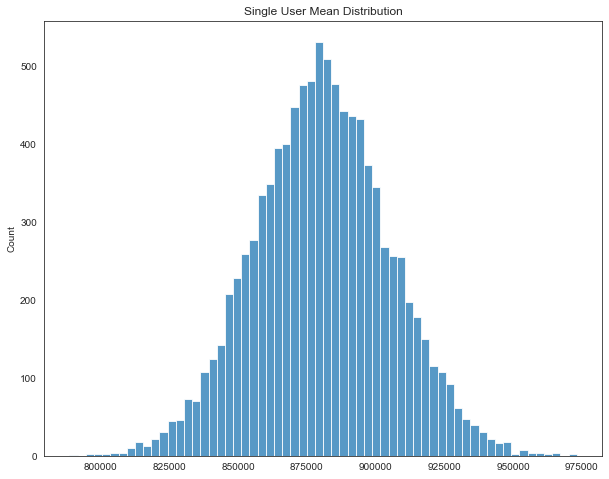

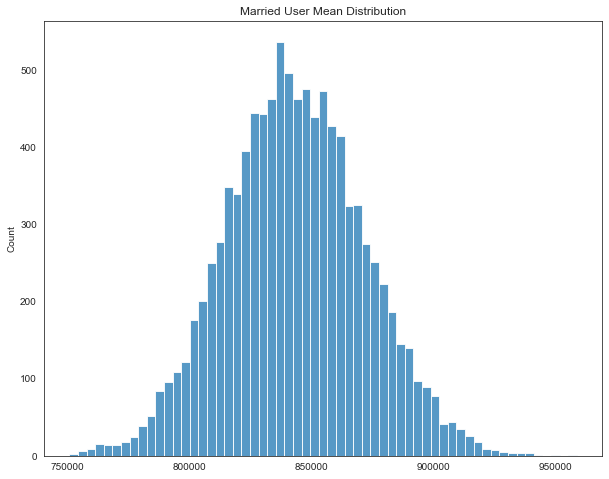

In [365]:
plt.figure(figsize=(10,8))
sns.histplot(data=single_user_mean_1025)
plt.title('Single User Mean Distribution')
plt.show()

plt.figure(figsize=(10,8))
sns.histplot(data=married_user_mean_750)
plt.title('Married User Mean Distribution')
plt.show()

In [366]:
print(np.mean(single_user_mean_1025),np.std(single_user_mean_1025))
print(np.mean(married_user_mean_750),np.std(married_user_mean_750))

880476.8781222439 24458.52674505232
843421.1453856 28397.858148511397


***Mean of sample means of single user purchase is 880476.87 and standard deviation is 24458.52***.
    
***Mean of sample means of married user purchase is 843421.14 and standard deviation is 28397.85***

In [368]:
#Considering 95% as confidence interval the z value is 1.96 which will help in finding the intervals

In [399]:
single_sample_lower_lim=np.mean(single_user_mean_1025) - 1.96*((single_user_std)/np.sqrt(1025))
single_sample_upper_lim=np.mean(single_user_mean_1025) + 1.96*((single_user_std)/np.sqrt(1025))

married_sample_lower_lim=np.mean(married_user_mean_750) - 1.96*((married_user_std)/np.sqrt(750))
married_sample_upper_lim=np.mean(married_user_mean_750) + 1.96*((married_user_std)/np.sqrt(750))

print("Single User purchase 95% confidence interval of means lie in range acc to CLT is: ({:.2f}, {:.2f})".format(single_sample_lower_lim, single_sample_upper_lim))
print("Married User purchase 95% confidence interval of means lie in range acc to CLT is: ({:.2f}, {:.2f})".format(married_sample_lower_lim, married_sample_upper_lim))

Single User purchase 95% confidence interval of means lie in range acc to CLT is: (822360.79, 938592.97)
Married User purchase 95% confidence interval of means lie in range acc to CLT is: (776492.38, 910349.91)


We can infer the below by using CLT:

***1) Average purchase of a male user for 95% of the time will lie in the range of (822360.79, 938592.97).***

***2) Average purchase of a female user for 95% of the time will lie in the range of (776492.38, 910349.91).***

# Applying Central Limit Theorem to find average user spent and confidence interval on black friday considering Age groups

In [384]:
age_user_amt=df.groupby(['User_ID','Age'])[['Purchase']].sum().reset_index()
age_user_amt

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [385]:
age_user_amt['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [388]:
age_user_amt['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
#Since we have 7 categories, considering constant sample mean of 250 for all of them

In [395]:
sample_size = 250
num_repitions = 1500
all_age_means={}
all_age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in all_age_intervals:
    all_age_means[i] = [] 

for i in all_age_intervals:
    for _ in range(num_repitions):
        mean = age_user_amt[age_user_amt['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_age_means[i].append(mean)

In [421]:
for i in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    age_purchase=age_user_amt[age_user_amt['Age']==i]
    
    Age_sample_lower_lim=np.mean(age_purchase['Purchase']) - 1.96*((np.std(age_purchase['Purchase']))/np.sqrt(250))
    Age_sample_upper_lim=np.mean(age_purchase['Purchase']) + 1.96*((np.std(age_purchase['Purchase']))/np.sqrt(250))
    
    print("For age {} 95% confidence interval of means lie in the range of: ({:.2f}, {:.2f})".format(i, Age_sample_lower_lim, Age_sample_upper_lim))

For age 26-35 95% confidence interval of means lie in the range of: (861810.75, 1117507.88)
For age 36-45 95% confidence interval of means lie in the range of: (758039.89, 1001291.53)
For age 18-25 95% confidence interval of means lie in the range of: (744842.29, 964883.95)
For age 46-50 95% confidence interval of means lie in the range of: (677460.22, 907637.34)
For age 51-55 95% confidence interval of means lie in the range of: (665085.79, 861316.06)
For age 55+ 95% confidence interval of means lie in the range of: (463256.72, 616137.77)
For age 0-17 95% confidence interval of means lie in the range of: (533894.96, 703840.67)


# Insights

Based on the whole dataset purchase value transactions

    1) Around ~85% of customer transactions belongs to the ages between 18 to 50.
    
    2) There are three city categories where larger share of transactions is from city category C i.e 42%.
    where most unique users belongs to B
    
    3) 75% of users are male customers who purchased on black friday.
    
    4) 60% are Single users, 40% are married users.
    
    5) There are 20 different occupation categories, highest no of users belong to 4 occupation category i.e. 13%.
    
    6) Most no of users purchased the products which belong to 5 product category i.e 27%.
    
    7) 35% of users are staying in current city for the past 1 year.

    8) On black friday sale the count of unique users who purchased is 5891 which constitutes 3631 products among 20 unique product categories

    9) There are 2677 outliers wrt to purchases done by the users



Summary :
1) Male users purchase is a bit higher than the female on Black friday.

2) All age groups have a similar range of purchase where 51-55 age group purchases are slightly higher.

3) Users from Occupation 12,17 have made higher purchases.

4) Users from city C group has less outliers and made higher purchases.

5) Users Marital status is not likely dependent to make a higher purchase.

6) Products belonging to 10,7,15,6 product categories have higher purchase value.

# Recomendations

1) Male customers spent more money in city category C than B or A, so more types of products will gives us more revenue and should give offers to category A & B.

2) Single Martial Status users spent more, so having unique combos of products can help.

3) Men spent more money than women, comapany should focus in providing more offers and sales to female users and retain male users.

4) Company should do reserch on products which are intreseted by age groups of 18-50.

5) Company should focus on product categories of products belonging to 10,7,15,6 which have a high value.